Equation of the Logistic Regression: 
1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


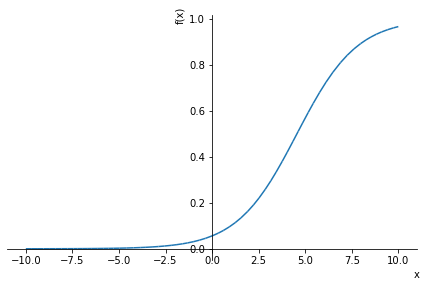

In [1]:
#Displaying the sigmoid curve within a Sigmoid curve

import math
from sympy import *

b0, b1, x = symbols('b0 b1 x')
p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)
print('Equation of the Logistic Regression: \n{0}'.format(p))

plot(p)

Value of b1: [0.69267212]
Value of b0: [-3.17576395]


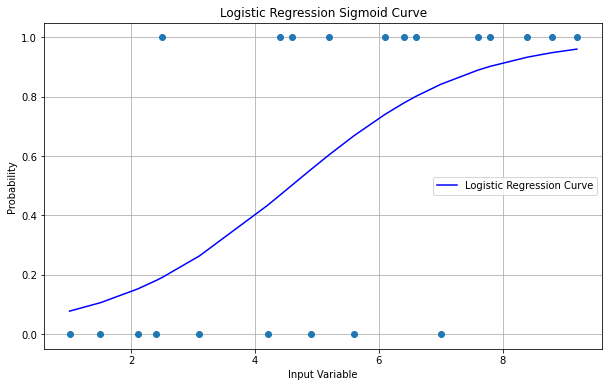

In [2]:
#Trying out logistic regression in SciPy

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sympy import *
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',')
X = df.values[:, :-1]
Y = df.values[:, -1]

#Performing logistic regression, turning off penalty/l1/l2
model = LogisticRegression(penalty='none')  
# To use l1 ridge regression, input code (penalty='l1', C=1.0, solver='liblinear')
# To use l2 lasso regression, input code (penalty='l2', C=1.0)
model.fit(X, Y)

#print b0 within the logistic regression model for given dataset
print('Value of b1: {0}'.format(model.coef_.flatten()))

#print b1 within the logistic regression model for given dataset
print('Value of b0: {0}'.format(model.intercept_.flatten()))

#plotting the logistic regression curve
Y_prob = model.predict_proba(X)[:, 1] # Probability of the positive class
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'o')
plt.plot(X, Y_prob, color='blue', label='Logistic Regression Curve')
plt.xlabel('Input Variable')
plt.ylabel('Probability')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
#Calculating the JOINT LIKELIHOOD of observing all the data points in above example for a given logistic regression

import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1 / (1 + math.exp(-(b0 + b1 * x)))
    return p

# calculate joint likelihood
joint_likelihood = 1.0

for p in patient_data:
    joint_likelihood *= logistic_function(p.x) ** p.y * \
                        (1 - logistic_function(p.x))** (1 - p.y)
    
print('Joint Likelihood of the Logistic Regression: {0}'.format(joint_likelihood))

Joint Likelihood of the Logistic Regression: 4.7911180221699105e-05


In [4]:
# Using natural log() for calculation of the Joint Likelihood

import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1 / (1 + math.exp(-(b0 + b1 * x)))
    return p

# calculate joint likelihood
joint_likelihood = 0.0  #notice initial value of joint likelihood was changed from 1.0 to 0.0 in log() case

for p in patient_data:
    joint_likelihood += math.log(logistic_function(p.x) ** p.y * \
                        (1 - logistic_function(p.x))** (1 - p.y))
    
joint_likelihood = math.exp(joint_likelihood)
                                
print('Joint Likelihood of the Logistic Regression: {0}'.format(joint_likelihood))

Joint Likelihood of the Logistic Regression: 4.791118022169896e-05


In [5]:
# Using Gradient Descent on Logistic Regression

from sympy import *
import pandas as pd
import math

points = list(pd.read_csv('https://tinyurl.com/y2cocoo7').itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)

joint_likelihood = Sum(log((1 / (1 + exp(-(b0 + b1 * x(i))))) ** y(i) \
                          * (1 - (1 / (1 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

# partial derivatives for m, with points substituted

deriv_wrt_b1 = diff(joint_likelihood, b1) \
                    .subs(n, len(points)-1).doit() \
                    .replace(x, lambda i: points[i].x) \
                    .replace(y, lambda i: points[i].y)

deriv_wrt_b0 = diff(joint_likelihood, b0) \
                    .subs(n, len(points)-1).doit() \
                    .replace(x, lambda i: points[i].x) \
                    .replace(y, lambda i: points[i].y)

# compile using lambdify for faster computations
deriv_wrt_b1 = lambdify([b1, b0], deriv_wrt_b1)
deriv_wrt_b0 = lambdify([b1, b0], deriv_wrt_b0)

# perform Gradient Descent
# set initial values for b1, b0, L
b1 = 0.01
b0 = 0.01
L = 0.001

for j in range(10000):
    b1 += deriv_wrt_b1(b1, b0) * L
    b0 += deriv_wrt_b0(b1, b0) * L
    
print('b1 value after performing Gradient Descent: {0} \nb0 value after performing Gradient Descent: {1}'.format(b1, b0))

b1 value after performing Gradient Descent: 0.6865214585145972 
b0 value after performing Gradient Descent: -3.1414903209613656


In [6]:
# Using Stochastic Gradient Descent on Logistic Regression

from sympy import *
import pandas as pd
import math
import numpy as np

points = list(pd.read_csv('https://tinyurl.com/y2cocoo7').itertuples())
data = pd.read_csv('https://tinyurl.com/y2cocoo7', header=0)
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# partial derivatives for m, with points substituted
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deriv_wrt_b1(x, y, b0, b1):
    y_pred = sigmoid(b0 + b1 * x)
    return np.mean((y_pred - y) * x)

def deriv_wrt_b0(x, y, b0, b1):
    y_pred = sigmoid(b0 + b1 * x)
    return np.mean(y_pred - y)

# perform Stochastic Gradient Descent
# set initial values for parameters
b1 = 0.01
b0 = 0.01
n = len(points)
L = 0.01
sample_size = 2
epochs = 1000000 #the no. of iterations to perform stochastic gradient descent

for j in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = x[idx]
    y_sample = y[idx]

    grad_b1 = deriv_wrt_b1(x_sample, y_sample, b0, b1)
    grad_b0 = deriv_wrt_b0(x_sample, y_sample, b0, b1)

    b1 -= L * grad_b1
    b0 -= L * grad_b0
    
print('b1 value after performing Stochastic Gradient Descent: {0} \nb0 value after performing Stochastic Gradient Descent: {1}'.format(b1, b0))

b1 value after performing Stochastic Gradient Descent: 0.712667833932449 
b0 value after performing Stochastic Gradient Descent: -3.209300812502085


In [8]:
# performing Multiple Logistic Regression on fabricated employee retention dataset

import pandas as pd
from sklearn.linear_model import LogisticRegression

# load the data
employee_data = pd.read_csv('https://tinyurl.com/y6r7qjrp', delimiter=',')

# get the multiple independent variables inputs
inputs = employee_data.iloc[:, :-1]

# get the dependent "did_quit" variable output
output = employee_data.iloc[:, -1]

# build the logistic regression
fit = LogisticRegression(penalty='none').fit(inputs, output)

# print the Coefficients for each input variables
print('Coefficients of SEX, AGE, PROMOTIONS, YEARS_EMPLOYED: {0}\n'.format(fit.coef_.flatten()))
print('Intercept (b0): {0}\n'.format(fit.intercept_.flatten()))

# interacting and testing with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    
    if prediction == [[1]]:
        return 'WILL LEAVE [False,  True]: {0}\n'.format(probabilities)
    else:
        return 'WILL STAY [False,  True]: {0}\n'.format(probabilities)
    
# test a prediction based on inputs
while True:
    n = input('Predict employee will leave or stay {sex}, {age}, {promotions}, {years_employed}: ')
    (sex, age, promotions, years_employed) = n.split(',')
    print(predict_employee_will_stay(int(sex), int(age), int(promotions), int(years_employed)))

Coefficients of SEX, AGE, PROMOTIONS, YEARS_EMPLOYED: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]

Intercept (b0): [-2.73485302]

Predict employee will leave or stay {sex}, {age}, {promotions}, {years_employed}: 1, 34, 2, 4
WILL STAY [False,  True]: [[0.92837417 0.07162583]]



KeyboardInterrupt: Interrupted by user

In [9]:
# calculate the R-sqaured value, log_likelihood, log_likelihood_fit of the logistic regression fit - traditional statistical metrics

from math import log, exp
import pandas as pd

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples())

# declare fitted logistic regression parameters
b0 = -3.263310731765048
b1 = 0.6865214585145972

# define logisitic function
def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# sum of log-likelihood WITH FIT
log_likelihood_fit = 0.0
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                        log(1 - logistic_function(p.x)) * (1 - p.y)
                        for p in patient_data)

print('Value of log-likelihood-fit of the logistic regression fit: {0:.3f}'.format(log_likelihood_fit))


# calculating the log-likelihood WITHOUT FIT
likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = 0.0
log_likelihood = sum(log(likelihood) * p.y + log(1 - likelihood) * (1 - p.y) for p in patient_data)
print('Value of log-likelihood of the logistic regression fit: {0:.3f}'.format(log_likelihood))


# calculating the R-squared (R2) for a logistic regression
r2 = (log_likelihood - log_likelihood_fit) / (log_likelihood)
print('R-squared value of fitted logistic regression: {0:.3f}'.format(r2))


# determining conclusion based on log-likelihood-fit of the logistic regression fit
if log_likelihood_fit < 0 or log_likelihood < 1.0:
    print('Conclusion based on log-likelihood: Less likelihood of symptoms appearing on patient')
elif log_likelihood_fit == 0 or log_likelihood == 1.0:
    print('Conclusion based on log-likelihood: Fair Odds')
else: 
    print('Conclusion based on log-likelihood: Higher likelihoood of symptoms appearing patient')


# determining conclusion based on R2 value
if r2 < 0.1:
    print('Based on R2 value of {0:.3f}: POOR fit'.format(r2))
elif r2 < 0.5:
    print('Based on R2 value of {0:.3f}: MEDIOCRE fit'.format(r2))
else: 
    print('Based on R2 value of {0:.3f}: RELATIVELY STRONG fit'.format(r2))

Value of log-likelihood-fit of the logistic regression fit: -9.969
Value of log-likelihood of the logistic regression fit: -14.341
R-squared value of fitted logistic regression: 0.305
Conclusion based on log-likelihood: Less likelihood of symptoms appearing on patient
Based on R2 value of 0.305: MEDIOCRE fit


In [10]:
# calculate p-value using Chi-Square (chi2) distribution for a given logistic regression - traditional statistical metrics

import pandas as pd
from math import log, exp
from scipy.stats import chi2

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples())

# declare fitted logistic regression parameters
b0 = -3.263310731765048
b1 = 0.6865214585145972

# define logisitic function
def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# calculating log-likelihood WITH FIT
log_likelihood_fit = 0.0
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                        log(1 - logistic_function(p.x)) * (1 - p.y)
                        for p in patient_data)

print('Value of log-likelihood-fit of the logistic regression fit: {0:.3f}'.format(log_likelihood_fit))


# calculating the log-likelihood WITHOUT FIT
likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = 0.0
log_likelihood = sum(log(likelihood) * p.y + log(1 - likelihood) * (1 - p.y) for p in patient_data)
print('Value of log-likelihood of the logistic regression fit: {0:.3f}'.format(log_likelihood))

# calculate p-value 
chi2_input = 2 * (log_likelihood_fit - log_likelihood)
p_value = chi2.pdf(chi2_input, 1)  #as degree of freedom (DOF) = n - 1 = 2 variables - 1 = 1
print('Value of p-value for the given fitted logistic regression: {0:.6f}'.format(p_value))

# conclusion on randomness based on p-value
if p_value < 0.05: 
    print('Based on p-value of {0:.6f}: LIKELY NOT DUE TO CHANCE, hence actual non-random relationship')
else: 
    print('Based on p-value of {0:.6f}: LIKELY DUE TO CHANCE')

Value of log-likelihood-fit of the logistic regression fit: -9.969
Value of log-likelihood of the logistic regression fit: -14.341
Value of p-value for the given fitted logistic regression: 0.001703
Based on p-value of {0:.6f}: LIKELY NOT DUE TO CHANCE, hence actual non-random relationship


In [11]:
# performing logistic regression with ten-fold cross-validation instead of traditional statistical metrics like R-squared value or p-value

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

#load the data
df = pd.read_csv('https://tinyurl.com/y6r7qjrp', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

# running the KFold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)  # "random_state" is the random seed, here its fixed to 7
model = LogisticRegression(penalty='none')
results = cross_val_score(model, X, Y, cv=kfold)

print('Accuracy Mean: {0:.5f} (stdev = {1:.8f})'.format(results.mean(), results.std()))

Accuracy Mean: 0.64667 (stdev = 0.21766437)


In [12]:
# creating a confusion matrix for a testing dataset in SciPy

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# load the data
df = pd.read_csv('https://bit.ly/3cManTi', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=7, stratify=Y)  # stratify=Y makes the model more accurate, having more TPs and TNs
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

# the confusion matrix evaluates accuracy within each category, 
# [[True Positives TP,  False Positives FP]
#  [False Negatives FN,  True Negatives TN]]

matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print('The confusion matrix is: \n{0}'.format(matrix))

The confusion matrix is: 
[[8 2]
 [2 6]]


In [13]:
# performing logistic regression with five-fold cross-validation & getting the AUC for ROC curve of logistic regression
# observed five-fold cross-validation gives higher AUC compared to three-fold/ten-fold cross-validation

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

#load the data
df = pd.read_csv('https://tinyurl.com/y6r7qjrp', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

# running the KFold cross-validation
kfold = KFold(n_splits=5, random_state=7, shuffle=True)  # "random_state" is the random seed, here its fixed to 7
model = LogisticRegression(penalty='none')
results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')

print('AUC: {0:.5f} (stdev = {1:.5f})'.format(results.mean(), results.std()))

AUC: 0.85819 (stdev = 0.16131)
